In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams["figure.dpi"] = 80

def remove_frame():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

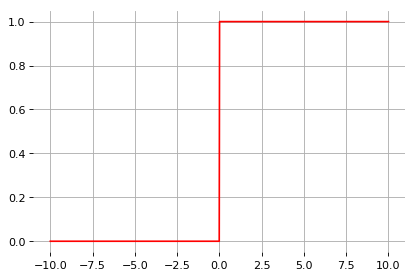

In [129]:
# 01
xs = np.linspace(-10,10, num=1000)
plt.plot(xs, (np.sign(xs)+1)/2.0, c="r")
plt.grid()
remove_frame()
plt.savefig("activation-sign.png")

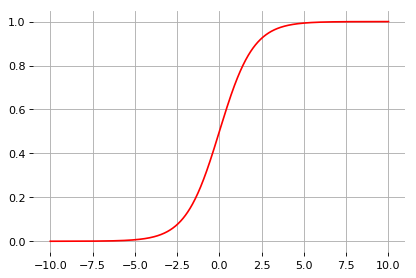

In [130]:
# sigmoid
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

xs = np.linspace(-10,10, num=1000)
plt.plot(xs, sigmoid(xs), c="r")
plt.grid()
remove_frame()
plt.savefig("activation-sigmoid.png")

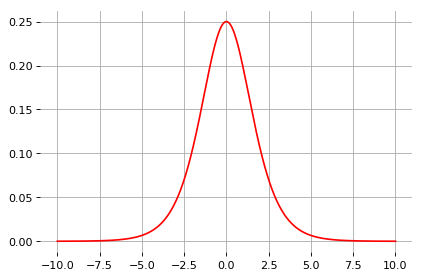

In [218]:
import autograd as ag
import autograd.numpy as np

grad_sigmoid = ag.elementwise_grad(sigmoid)

xs = np.linspace(-10,10, num=1000)
plt.plot(xs, grad_sigmoid(xs), c="r")
plt.grid()
remove_frame()
plt.savefig("activation-grad-sigmoid.png")

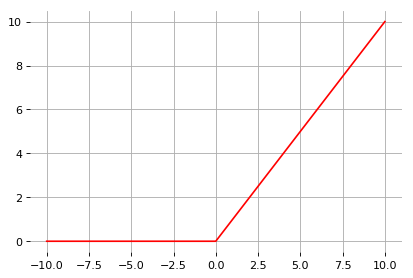

In [283]:
# relu
def relu(x):
    return np.clip(x, a_min=0, a_max=None)

xs = np.linspace(-10,10, num=1000)
plt.plot(xs, relu(xs), c="r")
plt.grid()
remove_frame()
plt.savefig("activation-relu.png")

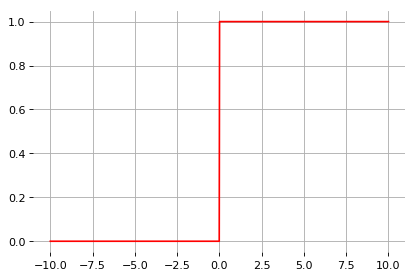

In [284]:
import autograd as ag
import autograd.numpy as np

grad_relu = ag.elementwise_grad(relu)

xs = np.linspace(-10,10, num=1000)
plt.plot(xs, grad_relu(xs), c="r")
plt.grid()
remove_frame()
plt.savefig("activation-grad-relu.png")

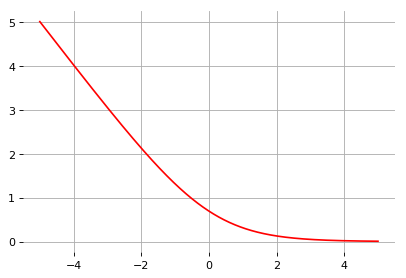

In [133]:
# logistic loss 
def logistic_loss(x):
    return -np.log(sigmoid(x))

xs = np.linspace(-5,5, num=1000)
plt.plot(xs, logistic_loss(xs), c="r")
plt.grid()
remove_frame()
plt.savefig("logistic_loss.png")

In [123]:
# lda
plt.rcParams["figure.dpi"] = 160

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import colors
import matplotlib as mpl
from scipy import linalg
from scipy.stats import multivariate_normal
import numpy as np

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 1)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 1)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

def dataset(case=0):
    n, dim = 300, 2
    np.random.seed(0)
    
    if case == 0:
        X = np.vstack([
            multivariate_normal(mean=np.array([0.0, 0.0]), 
                                cov=np.array([[1.0, 0.0], [0.0, 1.0]])).rvs(n),
            multivariate_normal(mean=np.array([1.0, 0.0]), 
                                cov=np.array([[1.0, 0.0], [0.0, 1.0]])).rvs(n), 
        ]) 
    elif case == 1:
        X = np.vstack([
            multivariate_normal(mean=np.array([0.0, 0.0]), 
                                cov=np.array([[0.01, 0.2], [0.2, 5.0]])).rvs(n), 
            multivariate_normal(mean=np.array([1.0, 0.0]), 
                                cov=np.array([[0.01, 0.2], [0.2, 5.0]])).rvs(n),   
        ])
    elif case == 2:    
        X = np.vstack([
            multivariate_normal(mean=np.array([0.0, 0.0]), 
                                cov=np.array([[1.0, 0.0], [0.0, 1.0]])).rvs(n),
            multivariate_normal(mean=np.array([1.0, 0.0]), 
                                cov=np.array([[0.01, 0.2], [0.2, 5.0]])).rvs(n),   
        ])

    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(1, 1, fig_index)

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
#     plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
#                    norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    
    remove_frame()

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='white',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

[]

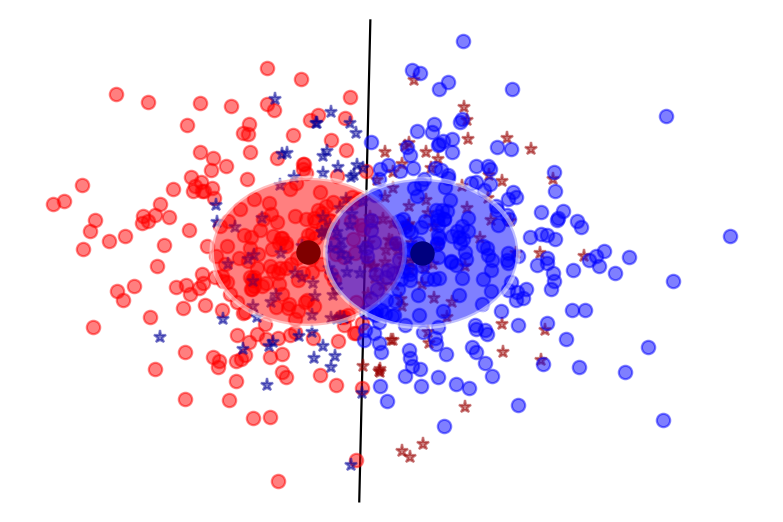

In [124]:
X, y = dataset(case=0)
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index=1)
plot_lda_cov(lda, splot)
plt.savefig("lda1.png")
plt.plot()

[]

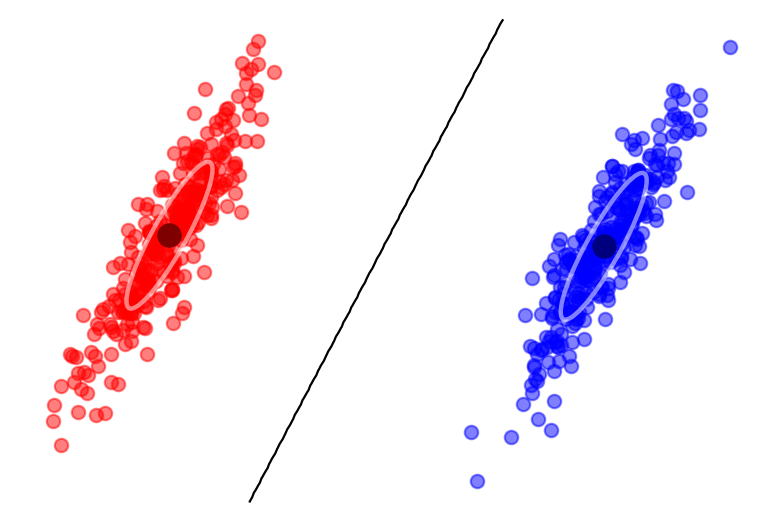

In [125]:
X, y = dataset(case=1)
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index=1)
plot_lda_cov(lda, splot)
plt.savefig("lda2.png")
plt.plot()

[]

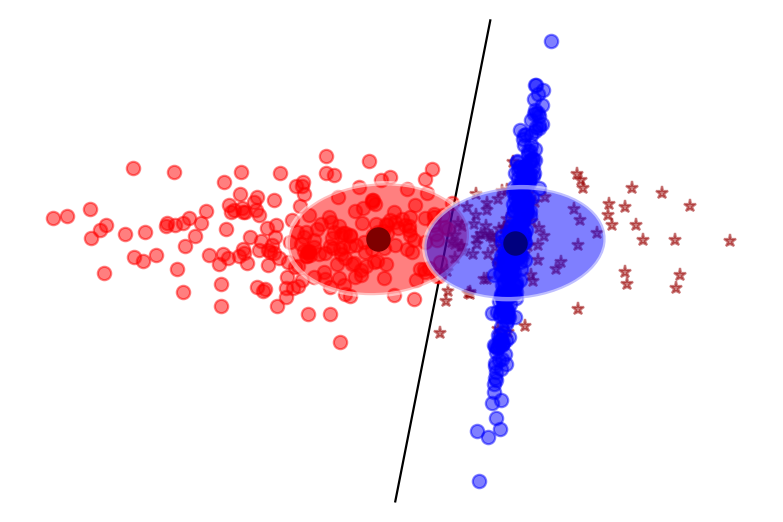

In [126]:
X, y = dataset(case=2)
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index=1)
plot_lda_cov(lda, splot)
plt.savefig("lda3.png")
plt.plot()

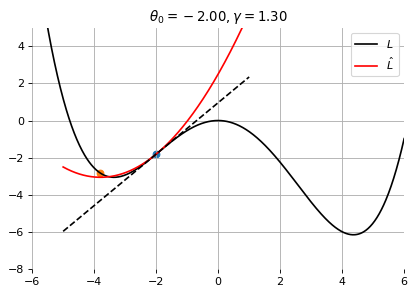

-3.7993809561519996 -1.0860950482001916


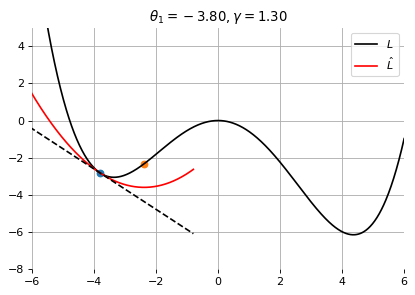

-2.3874573934917507 1.2542447404086878


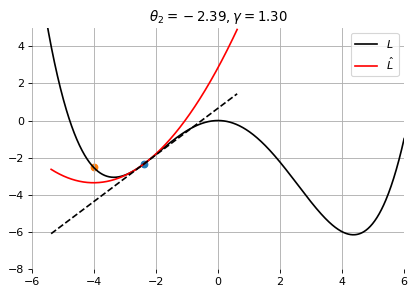

-4.017975556023045 -1.7678907165544553


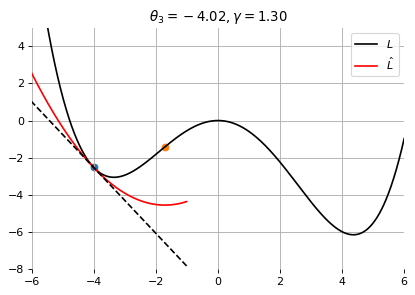

-1.7197176245022532 1.3717065180664494


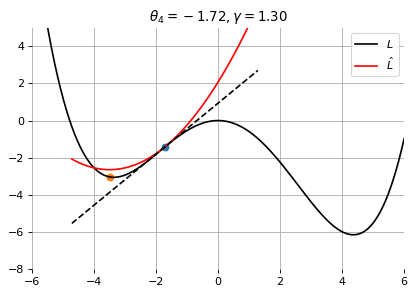

-3.5029360979886377 -0.3119582959046854


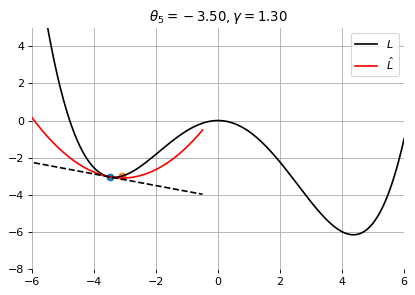

-3.097390313312547 0.4874776112585333


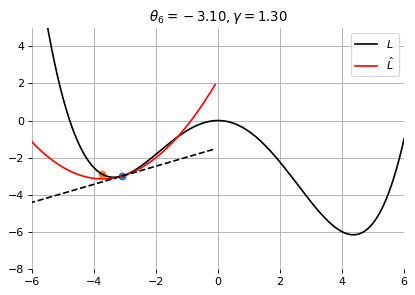

-3.73111120794864 -0.8928205071215904


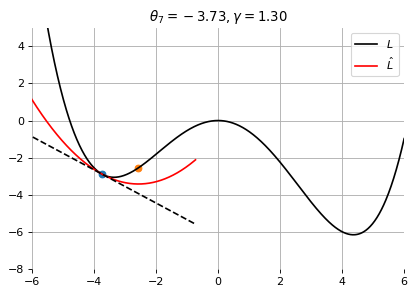

-2.5704445486905723 1.1264527201007783


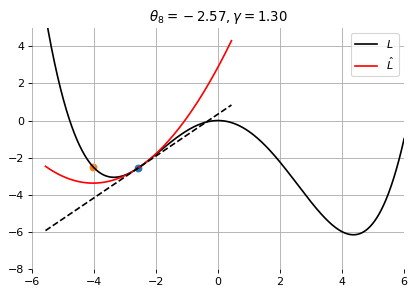

-4.034833084821584 -1.8245499350699852


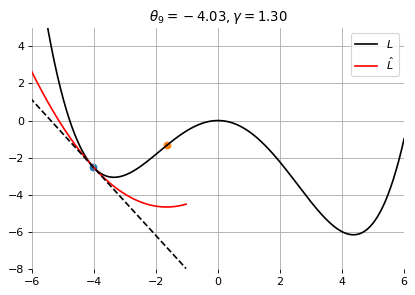

-1.6629181692306036 1.3594123686116806


In [288]:
## gradient descent
plt.rcParams["figure.dpi"] = 80

import autograd as ag
import autograd.numpy as np

def loss(x):
    return 0.02*((x-0.333) ** 4 - 30*x**2)

grad_loss = ag.grad(loss)

def approx(x0, eps, gamma=0.5):
    return loss(x0) + eps*grad_loss(x0) + 1./(2*gamma)*eps**2

def line(x0, eps):
    return loss(x0) + eps*grad_loss(x0) 

xs = np.linspace(-6,6, num=1000)
epss = np.linspace(-3,3, num=1000)
# gamma = 0.5
# x0 = -0.5
# gamma = 0.5
# x0 = 0.25
gamma = 1.3
x0 = -2.0

for i in range(10):
    plt.plot(xs, loss(xs), c="k", label="$L$")
    
    plt.plot([x0 + e for e in epss], [approx(x0, e, gamma=gamma) for e in epss], c="r", label="$\hat{L}$")
    plt.plot([x0 + e for e in epss], [line(x0, e) for e in epss], "k--")
    plt.scatter(x0, loss(x0))
    plt.scatter(x0-gamma*grad_loss(x0), loss(x0-gamma*grad_loss(x0)))
    plt.legend()
    plt.ylim(-8,5)
    plt.xlim(-6,6)
    plt.grid()
    remove_frame()
    plt.title("$\\theta_%d = %.2f, \gamma=%.2f$" % (i, x0, gamma))
    plt.savefig("gd-bad-%d.png" % i)
    plt.show()
    
    x0 = x0 - gamma * grad_loss(x0)
    print(x0, grad_loss(x0))

In [275]:
# check on derivatives 
def nn(x, w1, w2):
    return sigmoid(w2*sigmoid(w1*x))

In [276]:
x = -0.5
w1 = 0.25
w2 = -0.1

nn(x, w1, w2)

0.4882823801879445

In [277]:
grad_nn = ag.elementwise_grad(nn, argnum=1)
grad_nn(x, w1, w2)

0.003111115091803311

In [279]:
print(x)
u1 = w1*x
print(u1)
u2 = sigmoid(u1)
print(u2)
u3 = w2*u2
print(u3)
u4 = sigmoid(u3)
print(u4)

-0.5
-0.125
0.46879062662624377
-0.04687906266262438
0.4882823801879445


In [280]:
grad_sigmoid(u3)*w2*grad_sigmoid(u1)*x

0.003111115091803311

0.916666666666667



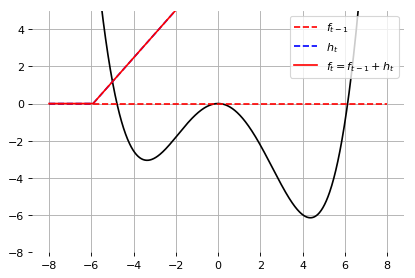

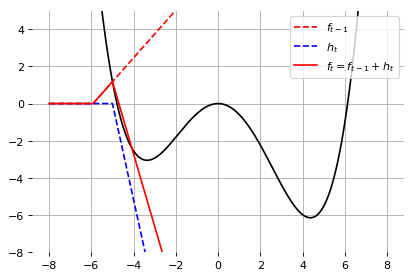

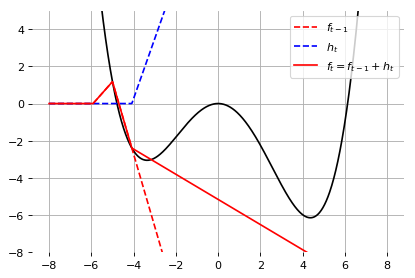

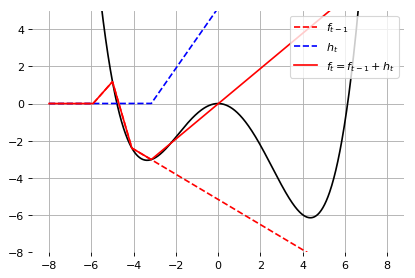

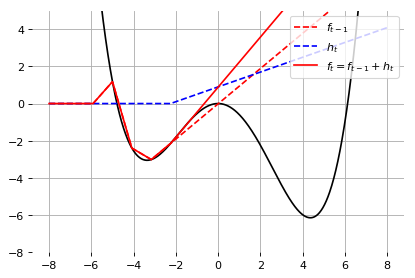

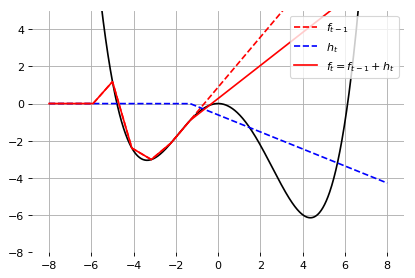

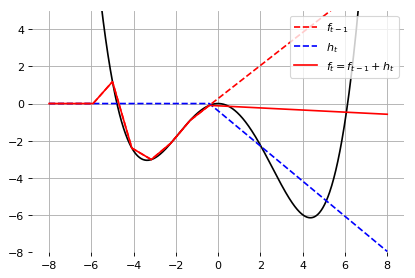

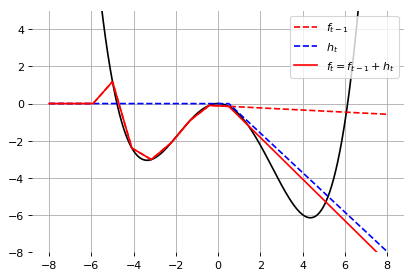

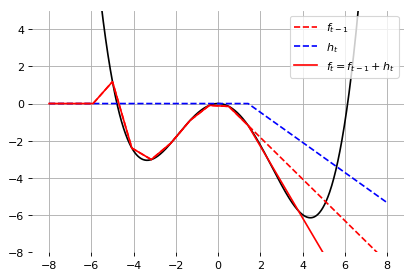

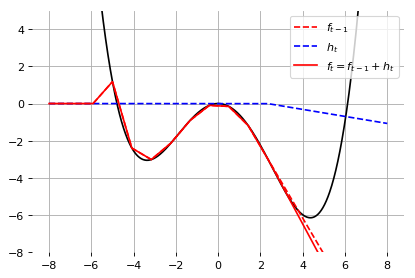

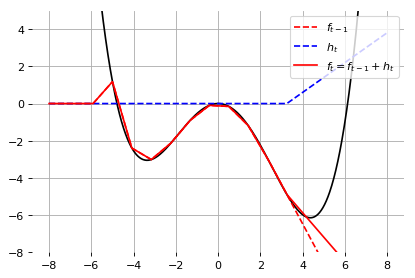

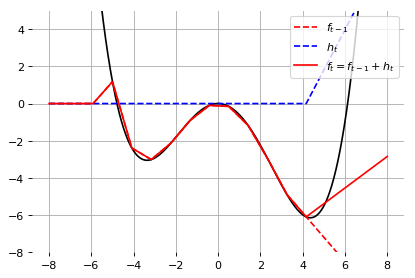

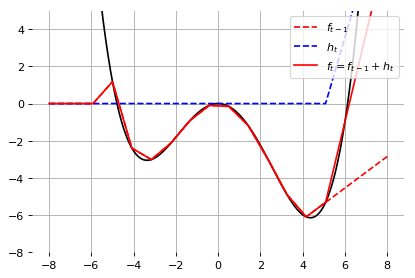

In [440]:
# universal approximation
def loss(x):
    return 0.02*((x-0.333) ** 4 - 30*x**2)

def relu(x):
    return x if x >= 0.0 else 0.0

relu = np.vectorize(relu)
    
activations = []
def nn(activations, x):   
    out = np.zeros_like(x)
    for w, b in activations:
        out += w * relu(x + b)
    return out

pieces = np.linspace(-5, 6, num=13)
offset = pieces[1] - pieces[0]
print(offset)
print()

for i, v in enumerate(pieces):
    delta = loss(v) - nn(activations, v)
    w = delta / offset 
    activations.append((w, offset-v))

    xs = np.linspace(-8, 8, num=1000)
    plt.plot(xs, loss(xs), c="k")
    plt.plot(xs, nn(activations[:-1], xs), "r--", label="$f_{t-1}$")
    plt.plot(xs, nn([activations[-1]], xs), "b--", label="$h_t$")
    plt.plot(xs, nn(activations, xs), "r", label="$f_t = f_{t-1}+h_t$")
    plt.legend(loc="upper right")
    plt.grid()
    plt.ylim(-8, 5)
    remove_frame()
    plt.savefig("ua-%d.png" % i)
    plt.show()
    print()